In [2]:
#imports 
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt


In [23]:
#read in data 
filepath = Path("../Data/TracfloDataFullSet.csv")
changeorder = pd.read_csv(filepath,)
changeorder.head()

,total,paid_total,balance,breakdowns_labor_0_type,breakdowns_labor_0_hours,breakdowns_labor_0_rate,breakdowns_material_0_quantity,breakdowns_material_0_unit,breakdowns_material_0_rate,Slug,...,Labor Breakdown_quantity3,Labor Breakdown_quantity total,Labor Breakdown_hours,Labor Breakdown_hours2,Labor Breakdown_hours3,Labor Breakdown_hourstotal,Labor Breakdown_ratetotal,Material Breakdown_rate,Material Breakdown_quantity,Material Breakdown_unit
0,133000.0,0.0,133000.0,NaN,8.0,NaN,NaN,NaN,NaN,193,...,NaN,0,8,NaN,NaN,8,165.0,NaN,NaN,NaN
1,27248.0,0.0,27248.0,NaN,8.0,NaN,NaN,NaN,NaN,248,...,NaN,0,8,NaN,NaN,8,0.0,NaN,NaN,NaN
2,-5000.0,0.0,-5000.0,NaN,NaN,NaN,NaN,NaN,NaN,251,...,NaN,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
3,13852.0,0.0,13852.0,NaN,NaN,NaN,NaN,NaN,NaN,252,...,NaN,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
4,0.0,0.0,0.0,NaN,8.0,NaN,NaN,NaN,NaN,253,...,NaN,0,8,NaN,NaN,8,0.0,NaN,NaN,NaN


In [4]:
changeorder=changeorder.drop(columns="Scope of Work")

In [5]:
X=changeorder

In [6]:
# Splitting into Train and Test sets

X_train, X_test = train_test_split(X)

In [7]:
# Creating StandardScaler instance
#scaler = StandardScaler()


In [8]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# train data
X_inliers = X_train

In [11]:
X_inliers.shape

(1499, 9)

In [12]:
# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(1499, 9))
X = np.r_[X_inliers, X_outliers]

In [13]:
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [14]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

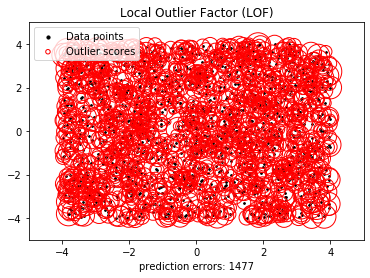

In [19]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()